In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# having issues loading the file, may have to try a diffrence decoding method

import chardet

with open("/content/Superstore.csv", 'rb') as f:
    result = chardet.detect(f.read())

# This way the decoding method is found an used.

df = pd.read_csv("/content/Superstore.csv", encoding=result['encoding'])

print(df.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

✅**PHASE 1: Set Up and Understand the Data**

In [2]:
# month_order = [
#     'January', 'February', 'March', 'April', 'May', 'June',
#     'July', 'August', 'September', 'October', 'November', 'December'
# ]

In [3]:
# df['Month'] = pd.Categorical(
#     df['Order Date'].dt.month_name(),  # Extract full month names
#     categories=month_order,            # Enforce correct order
#     ordered=True                       # Treat as ordinal (not just strings)
# )

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.shape


(9994, 21)

In [6]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [7]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates
# Example: df.drop_duplicates(inplace=True)

0


✅**PHASE 2: Exploratory Data Analysis (EDA)**



In [9]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

# Since the df is all clean i can just do a simple sum of the sales column to get my answer.

Total Sales: $2,297,200.86


In [10]:
# Again, because both the df and value types are well organized i can just run a simple sum to find

total_profit = df['Profit'].sum()
print(f"Total Profit: ${total_profit:,.2f}")

Total Profit: $286,397.02


In [11]:
total_quantity = df['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity:,} Units")

Total Quantity Sold: 37,873 Units


In [12]:
dicount_count = df['Discount'].value_counts().sum()
print(dicount_count)

9994


In [13]:
# To find the average (mean)  of the discount column

avg_discount = df['Discount'].mean() * 100
print(f"Average Discount: {avg_discount:.2f}%")

Average Discount: 15.62%


Insight into orders and costumer data.

In [14]:
unique_customers = df['Customer ID'].nunique()
print(f"Number of Unique Customers: {unique_customers}")

unique_orders = df['Order ID'].nunique()
print(f"Number of Unique Orders: {unique_orders}")

# avg_unit_per_order =  unique_orders / unique_customers
# print(f"Average Unit Per order: {avg_unit_per_order:.2f} Units")

avg_unit_per_order = total_quantity / unique_orders
print(f"Average Unit Per order: {avg_unit_per_order:.2f} Units")




Number of Unique Customers: 793
Number of Unique Orders: 5009
Average Unit Per order: 7.56 Units


 Sales & Profit by Segment

In [15]:
# By region

region_stats = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
print(region_stats)

# # By Country
# region_stats = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
# print(region_stats)

# # By Country
# region_stats = df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
# print(region_stats)

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


In [16]:
# By State

styled_table = (
    region_stats.style
    .format({'Sales': '${:,.2f}', 'Profit': '${:,.2f}'})  # Format as currency
    .background_gradient(cmap='Blues', subset=['Sales'])   # Color-code sales
    .bar(subset=['Profit'], color='#FFA07A')               # Add profit bars
)

# Display the styled table
styled_table

,Sales,Profit
Region,,
West,"$725,457.82","$108,418.45"
East,"$678,781.24","$91,522.78"
Central,"$501,239.89","$39,706.36"
South,"$391,721.91","$46,749.43"


In [17]:
# By product

category_stats = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)

# Format the numeric columns
formatted_stats = category_stats.copy()
formatted_stats['Sales'] = formatted_stats['Sales'].apply(lambda x: f"${x:,.2f}")
formatted_stats['Profit'] = formatted_stats['Profit'].apply(lambda x: f"${x:,.2f}")

print(formatted_stats)
#

                                    Sales       Profit
Category        Sub-Category                          
Technology      Phones        $330,007.05   $44,515.73
Furniture       Chairs        $328,449.10   $26,590.17
Office Supplies Storage       $223,843.61   $21,278.83
Furniture       Tables        $206,965.53  $-17,725.48
Office Supplies Binders       $203,412.73   $30,221.76
Technology      Machines      $189,238.63    $3,384.76
                Accessories   $167,380.32   $41,936.64
                Copiers       $149,528.03   $55,617.82
Furniture       Bookcases     $114,880.00   $-3,472.56
Office Supplies Appliances    $107,532.16   $18,138.01
Furniture       Furnishings    $91,705.16   $13,059.14
Office Supplies Paper          $78,479.21   $34,053.57
                Supplies       $46,673.54   $-1,189.10
                Art            $27,118.79    $6,527.79
                Envelopes      $16,476.40    $6,964.18
                Labels         $12,486.31    $5,546.25
          

In [18]:
# By shipping mode

shipping_stats = df.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)

formatted_stats = shipping_stats.copy()
formatted_stats['Sales'] = formatted_stats['Sales'].apply(lambda x: f"${x:,.2f}")
formatted_stats['Profit'] = formatted_stats['Profit'].apply(lambda x: f"${x:,.2f}")

print(formatted_stats)

                        Sales       Profit
Ship Mode                                 
Standard Class  $1,358,215.74  $164,088.79
Second Class      $459,193.57   $57,446.64
First Class       $351,428.42   $48,969.84
Same Day          $128,363.12   $15,891.76


In [19]:
# By customer segment

segment_stats = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)

formatted_stats = segment_stats.copy()
formatted_stats['Sales'] = formatted_stats['Sales'].apply(lambda x: f"${x:,.2f}")
formatted_stats['Profit'] = formatted_stats['Profit'].apply(lambda x: f"${x:,.2f}")

print(formatted_stats)

                     Sales       Profit
Segment                                
Consumer     $1,161,401.34  $134,119.21
Corporate      $706,146.37   $91,979.13
Home Office    $429,653.15   $60,298.68


In [20]:
# Are high-sales regions/categories also the most profitable?

region_stats['Profit Margin'] = (region_stats['Profit'] / region_stats['Sales']) * 100

formatted_stats = region_stats.copy()
formatted_stats['Sales'] = formatted_stats['Sales'].apply(lambda x: f"${x:,.2f}")
formatted_stats['Profit'] = formatted_stats['Profit'].apply(lambda x: f"${x:,.2f}")

print(formatted_stats.sort_values('Profit Margin', ascending=False))

               Sales       Profit  Profit Margin
Region                                          
West     $725,457.82  $108,418.45      14.944831
East     $678,781.24   $91,522.78      13.483399
South    $391,721.91   $46,749.43      11.934342
Central  $501,239.89   $39,706.36       7.921629


Now Time for Trend analysis

In [21]:
# Convert 'Order Date' to datetime (if not already)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')  # Adjust format if needed (e.g., %d-%m-%Y)

# Check the conversion
print(df['Order Date'].dtype)  # Should output: datetime64[ns]

datetime64[ns]


In [22]:
# Extract year, month, and quarter
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()  # e.g., "January"

# Optional: Combine year and month (e.g., "2023-Jan")
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%b')

df['Quarter'] = df['Order Date'].dt.quarter

monthly_revenue = df.groupby('Year-Month', as_index=False)['Sales'].sum()



To many formating issues, let's add something to help us.

In [23]:
def format_currency(df, columns):
    """Format specified columns as currency in a DataFrame."""
    return df.style.format({col: '${:,.2f}' for col in columns})


In [24]:
monthly_trends = df.groupby(['Year', 'Month', 'Year-Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
format_currency(monthly_trends.head(), ['Sales', 'Profit'])

,Year,Month,Year-Month,Sales,Profit
0,2014,April,2014-Apr,"$28,295.35","$3,488.84"
1,2014,August,2014-Aug,"$27,909.47","$5,318.10"
2,2014,December,2014-Dec,"$69,545.62","$8,983.57"
3,2014,February,2014-Feb,"$4,519.89",$862.31
4,2014,January,2014-Jan,"$14,236.90","$2,450.19"


In [25]:
# quarterly_trends = df.groupby(['Year', 'Quarter']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# format_currency(quarterly_trends.head(), ['Sales', 'Profit'])

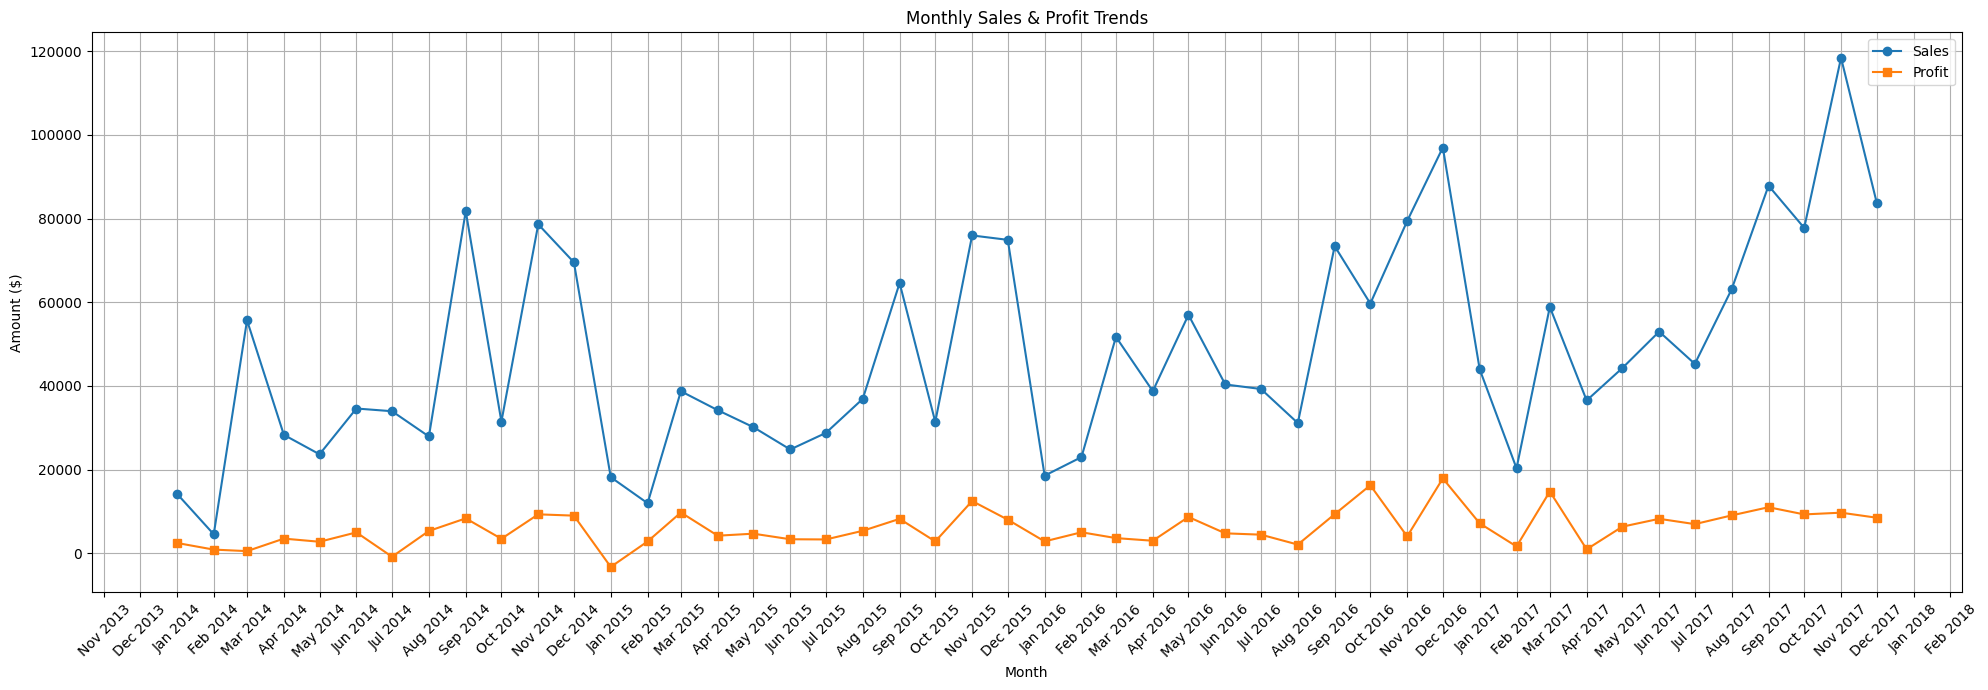

In [35]:
import matplotlib.dates as mdates

# Plot
plt.figure(figsize=(20, 7))
plt.plot(monthly_trends['Year-Month'], monthly_trends['Sales'], marker='o', label='Sales')
plt.plot(monthly_trends['Year-Month'], monthly_trends['Profit'], marker='s', label='Profit')
plt.title('Monthly Sales & Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)

# ✅ Format x-axis to show **every month**
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 📌 Time-Series Insights

- Sales peaked in May 2017, but before that it had dropped significantly in December 2014.
- Profitability showed a steady increase from Q2 to the last month of Q4
- There’s a clear seasonal trend in sales over time.

In [46]:
# # Pivot table for YoY comparison
# yoy_growth = monthly_trends.pivot(index='Month', columns='Year', values='Sales').reset_index()\

# print(yoy_growth)

Profitability Insights

In [44]:
# Generate the profitability analysis
profit_analysis = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Calculate Profit Margin
profit_analysis['Profit Margin (%)'] = (profit_analysis['Profit'] / profit_analysis['Sales']) * 100

# Format as styled table
styled_table = (
    profit_analysis.sort_values('Profit Margin (%)', ascending=True)
    .style
    .format({
        'Sales': '${:,.2f}',
        'Profit': '${:,.2f}',
        'Discount': '{:.2%}',
        'Profit Margin (%)': '{:.2f}%'
    })
    .bar(subset=['Profit Margin (%)'], color='#FFA07A')  # Orange bars for margins
    .background_gradient(subset=['Sales'], cmap='Blues')  # Blue gradient for sales
    .set_caption('Profitability by Category & Sub-Category')
    .set_properties(**{'text-align': 'center'})
)

styled_table

,Category,Sub-Category,Sales,Profit,Discount,Profit Margin (%)
3,Furniture,Tables,"$206,965.53","$-17,725.48",26.13%,-8.56%
0,Furniture,Bookcases,"$114,880.00","$-3,472.56",21.11%,-3.02%
12,Office Supplies,Supplies,"$46,673.54","$-1,189.10",7.68%,-2.55%
15,Technology,Machines,"$189,238.63","$3,384.76",30.61%,1.79%
1,Furniture,Chairs,"$328,449.10","$26,590.17",17.02%,8.10%
11,Office Supplies,Storage,"$223,843.61","$21,278.83",7.47%,9.51%
16,Technology,Phones,"$330,007.05","$44,515.73",15.46%,13.49%
2,Furniture,Furnishings,"$91,705.16","$13,059.14",13.83%,14.24%
6,Office Supplies,Binders,"$203,412.73","$30,221.76",37.23%,14.86%
4,Office Supplies,Appliances,"$107,532.16","$18,138.01",16.65%,16.87%


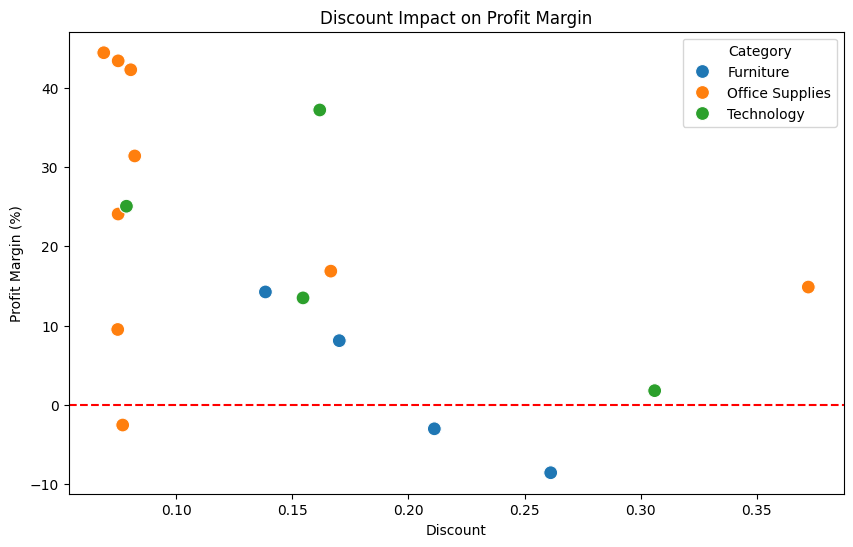

In [43]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=profit_analysis,
    x='Discount',
    y='Profit Margin (%)',
    hue='Category',
    s=100  # Marker size
)
plt.title("Discount Impact on Profit Margin")
plt.axhline(0, color='red', linestyle='--')  # Break-even line
plt.show()

Some items have low returns but high discount, reducing discount could help.

Note that shiping costs are not included in the data sets, maybe furnitures are been held back by shipping costs


✅ PHASE 3: KPIs & Visualization

In [39]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5009


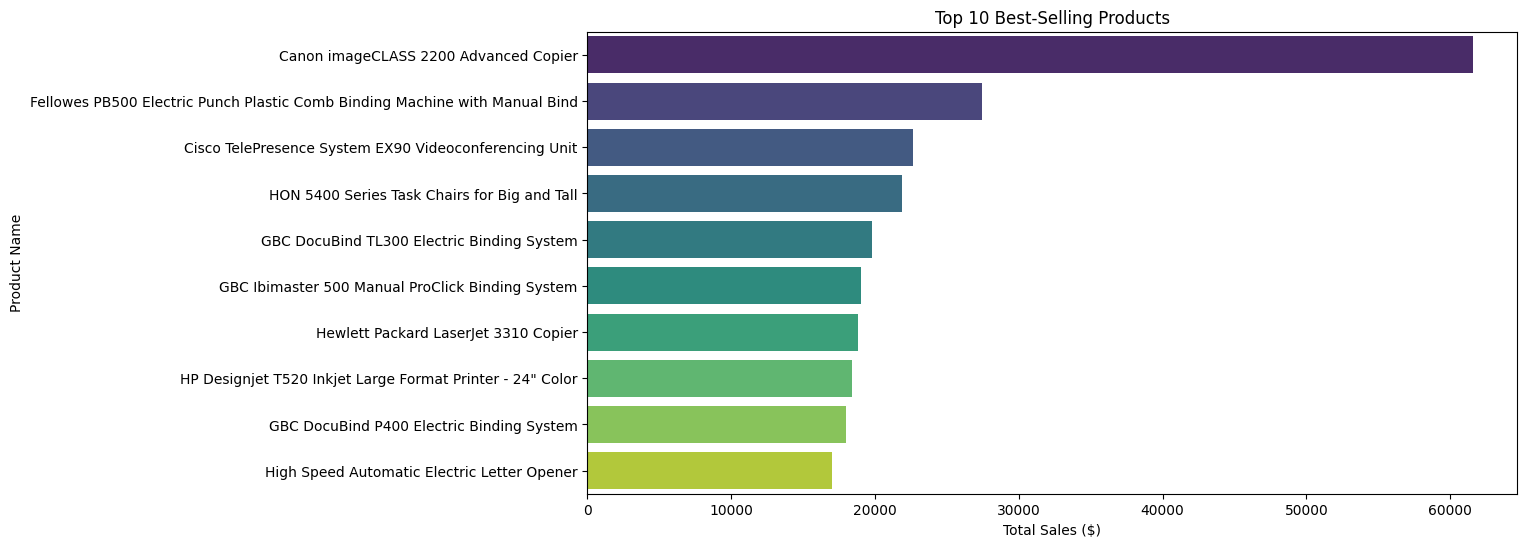

In [38]:
# Insights into top products to see what's keeping the company going

top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_products,
    x='Sales',
    y='Product Name',
    hue='Product Name',  # Map palette to this variable
    palette='viridis',
    legend=False  # Hide redundant legend
)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')
plt.show()

Now to find the top 10 most profitable states and also the least 10.

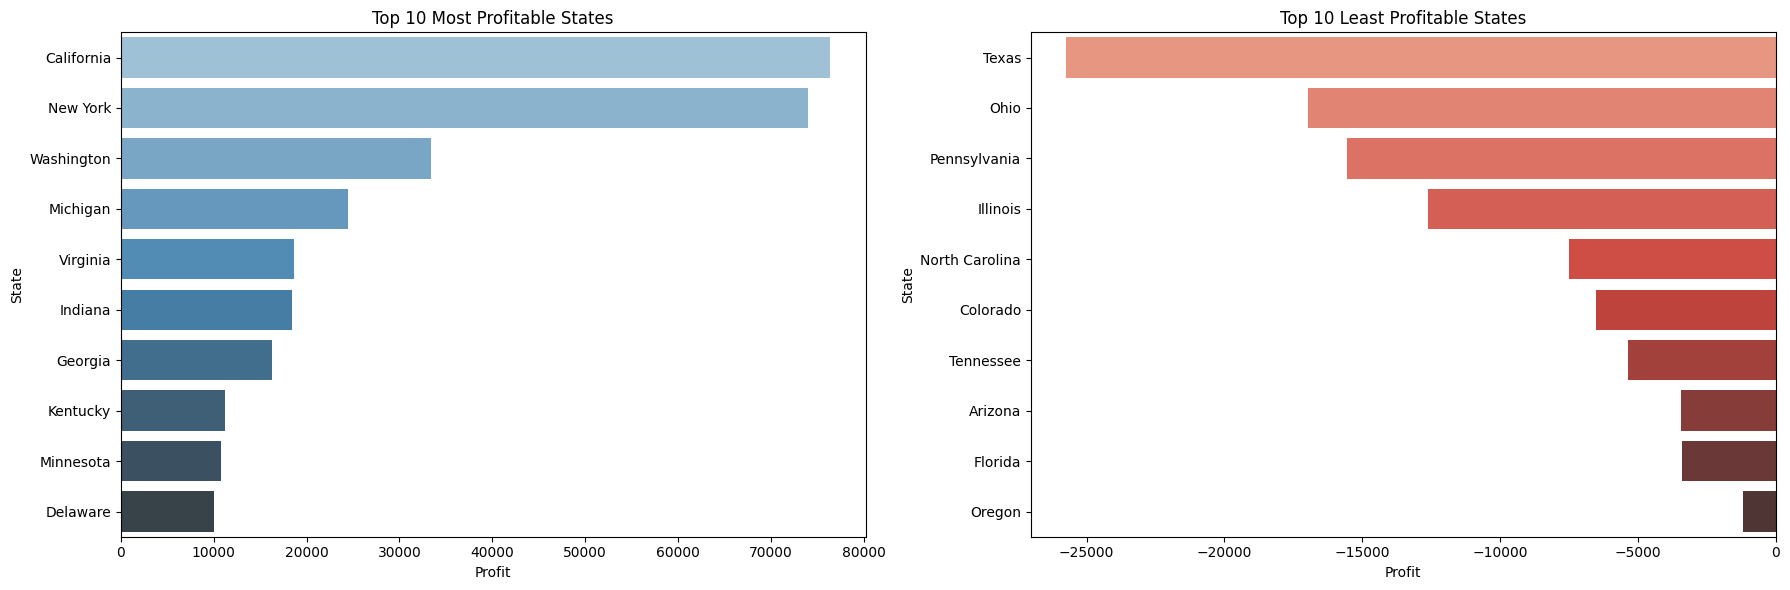

In [37]:
# Group profit by state (or region)
profit_by_state = df.groupby('State')['Profit'].sum().reset_index()

# Sort and filter top/bottom 10 states
top_states = profit_by_state.nlargest(10, 'Profit')
bottom_states = profit_by_state.nsmallest(10, 'Profit')

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=top_states, x='Profit', y='State', ax=ax1, hue = 'State' , palette='Blues_d', legend= False)
sns.barplot(data=bottom_states, x='Profit', y='State', hue = 'State', ax=ax2, palette='Reds_d', legend= False)
ax1.set_title('Top 10 Most Profitable States')
ax2.set_title('Top 10 Least Profitable States')
plt.tight_layout()
plt.show()

Line Plot: Monthly Revenue Trend

Markdown Cell

📌 Key Insights

- The **West** region has the highest overall profit, followed by Central.
- **Office Supplies** is a high-volume but lower-profit category.
- Discounts are highly concentrated around 0–20%, with few extreme cases.
- Sub-categories like **Chairs** and **Phones** contribute most to sales.
